In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [3]:
df = pd.read_csv('../data/transactions.csv', parse_dates=['create_date',])
df.head()

client_id gender  birth_date create_date  \
0  fe60b594364f9f636266ed1ef4f89c32      Ж        1985  2020-01-29   
1  3012cabca5885ed53d348d6e57dab5de      М        1951  2009-09-24   
2  d871ef96820b6c7a1ada8e01a772724e      Ж        1982  2006-12-25   
3  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   
4  0bacbc2abd314f9fac031d249e485a7b      М        1955  2011-04-15   

  nonresident_flag  businessman_flag              city  term  contract_sum  \
0                R                 0  Гусь-Хрустальный   NaN           0.0   
1                R                 0           Ишимбай   NaN           0.0   
2                R                 0              Юрга   NaN           0.0   
3                R                 0             Томск   NaN           0.0   
4                R                 0             Томск   NaN           0.0   

                         product_category_name  ...  \
0  Договор на текущий счет для дебетовой карты  ...   
1  Договор на текущий счет для дебетовой карты  ...   
2  Договор на текущий счет для дебетовой карты  ...   
3  Договор на текущий счет для дебетовой карты  ...   
4  Договор на текущий счет для дебетовой карты  ...   

              card_type_name start_date  fact_close_date  purchase_sum  \
0      Visa Platinum Rewards     2019.0           2021.0       16600.0   
1               VISA Classic     2019.0              NaN           0.0   
2                        NaN        NaN              NaN           0.0   
3               Visa Rewards     2021.0              NaN       24300.0   
4  Eurocard/MasterCard World     2018.0           2022.0       24300.0   

   purchase_count  current_balance_avg_sum  current_balance_sum  \
0              71                  39700.0              25700.0   
1               0                   1900.0               1000.0   
2               0                      0.0                  0.0   
3             118                      0.0                  0.0   
4             118                      0.0                  0.0   

   current_debit_turn_sum  current_credit_turn_sum  card_type  
0                220600.0                 201000.0         dc  
1                  6200.0                   3000.0         dc  
2                     0.0                      0.0         dc  
3                 35400.0                  35400.0         cc  
4                 35400.0                  35400.0         cc  

[5 rows x 21 columns]

In [5]:

# types
df['create_date'] = pd.to_datetime(df['create_date']).dt.date
df['birth_year'] = df['birth_date'].fillna(-9999).astype(int)
df['start_year'] = df['start_date'].fillna(-9999).astype(int)
df['fact_close_year'] = df['fact_close_date'].fillna(-9999).astype(int)

df['businessman_flag'] = df['businessman_flag'].astype(int)

df.drop(['start_date', 'birth_date', 'fact_close_date'], inplace=True,  axis=1)

In [6]:
from datetime import date
df['age'] = date.today().year - df['birth_year']

#### drop null column

In [8]:
df.drop(['term', 'businessman_flag'], axis=1, inplace=True)

### see describe

In [9]:
df.describe(include='all').T

count unique  \
client_id                  371583  16797   
gender                     371583      2   
create_date                371583   3659   
nonresident_flag           371583      2   
city                       370415    150   
contract_sum             371583.0    NaN   
product_category_name      371583      2   
card_id                    371583  22583   
card_type_name             318638     27   
purchase_sum             371583.0    NaN   
purchase_count           371583.0    NaN   
current_balance_avg_sum  371583.0    NaN   
current_balance_sum      371583.0    NaN   
current_debit_turn_sum   371583.0    NaN   
current_credit_turn_sum  371583.0    NaN   
card_type                  371583      2   
birth_year               371583.0    NaN   
start_year               371583.0    NaN   
fact_close_year          371583.0    NaN   
age                      371583.0    NaN   
age_group                  371583      4   

                                                                 top    freq  \
client_id                           135b078a216f3152f7c39c7780a46ba6     336   
gender                                                             Ж  199668   
create_date                                               2016-09-30    3892   
nonresident_flag                                                   R  361915   
city                                                             Уфа   59076   
contract_sum                                                     NaN     NaN   
product_category_name    Договор на текущий счет для дебетовой карты  352533   
card_id                             bb609973024e83acdc33b86518958f8b      72   
card_type_name                        Дебет карта ПС МИР "Бюджетная"   60754   
purchase_sum                                                     NaN     NaN   
purchase_count                                                   NaN     NaN   
current_balance_avg_sum                                          NaN     NaN   
current_balance_sum                                              NaN     NaN   
current_debit_turn_sum                                           NaN     NaN   
current_credit_turn_sum                                          NaN     NaN   
card_type                                                         dc  353524   
birth_year                                                       NaN     NaN   
start_year                                                       NaN     NaN   
fact_close_year                                                  NaN     NaN   
age                                                              NaN     NaN   
age_group                                                        >35  252763   

                                 mean            std     min     25%     50%  \
client_id                         NaN            NaN     NaN     NaN     NaN   
gender                            NaN            NaN     NaN     NaN     NaN   
create_date                       NaN            NaN     NaN     NaN     NaN   
nonresident_flag                  NaN            NaN     NaN     NaN     NaN   
city                              NaN            NaN     NaN     NaN     NaN   
contract_sum             12579.794824  131703.963913     0.0     0.0     0.0   
product_category_name             NaN            NaN     NaN     NaN     NaN   
card_id                           NaN            NaN     NaN     NaN     NaN   
card_type_name                    NaN            NaN     NaN     NaN     NaN   
purchase_sum              6449.207041   26380.601085  -700.0     0.0     0.0   
purchase_count               8.309522      18.315616    -1.0     0.0     0.0   
current_balance_avg_sum  29651.456606  219497.334817     0.0     0.0   300.0   
current_balance_sum      29497.085173  221982.470394     0.0     0.0     0.0   
current_debit_turn_sum   29971.733637  233185.081798     0.0     0.0  1600.0   
current_credit_turn_sum  29731.494175  238400.945541     0.0     0.0  1700.0   
card_type         

### data normalization

In [10]:
cliend_df = df[
    ['client_id', 'gender', 'birth_year',  'city',
     'create_date', 'nonresident_flag', ]
].drop_duplicates()
cliend_df.shape

(16797, 6)

In [11]:
card_df = df[
    ['card_id', 'product_category_name', 'card_type_name', 'card_type', 'start_year', 'fact_close_year', ]
].drop_duplicates()
card_df.shape

(22594, 6)

In [12]:
client_x_cards_df = df[
    ['client_id', 'card_id']
].drop_duplicates()
client_x_cards_df.shape

(22630, 2)

In [13]:
time_aggregations_df = df[
    [
        # index 
        'client_id', 'card_id',
        'purchase_count',  
        'purchase_sum', 
        'current_balance_avg_sum', 'current_balance_sum', 
        'current_debit_turn_sum', 'current_credit_turn_sum']
] # .drop_duplicates()

time_aggregations_df['rn'] = time_aggregations_df.groupby(["client_id","card_id"]).cumcount() + 1
time_aggregations_df.shape

/var/folders/z8/z8v6zgw10_75f7fbkk5sz4240000gp/T/ipykernel_15320/1699257352.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_aggregations_df['rn'] = time_aggregations_df.groupby(["client_id","card_id"]).cumcount() + 1


(371583, 9)

In [14]:
cliend_df[cliend_df['client_id'] == 'ac00d5b16b96acf46b7d8472b4a38fe2']

client_id gender  birth_year  city create_date  \
369384  ac00d5b16b96acf46b7d8472b4a38fe2      М        1977  Ейск  2007-05-21   

       nonresident_flag  
369384                R

In [15]:
card_df[card_df['card_id'] == '9416050372d690b3d48d435f6c84e193']

card_id product_category_name card_type_name  \
369384  9416050372d690b3d48d435f6c84e193       Кредитная карта            NaN   

       card_type  start_year  fact_close_year  
369384        dc       -9999            -9999

In [16]:
time_aggregations_df[time_aggregations_df['client_id'] == 'ac00d5b16b96acf46b7d8472b4a38fe2']

client_id                           card_id  \
369384  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
369478  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
369520  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
369675  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
369765  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
369898  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
369977  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
370099  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
370252  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
370283  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
370432  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
370520  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
370742  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
370872  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
371000  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
371130  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
371275  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
371423  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   
371571  ac00d5b16b96acf46b7d8472b4a38fe2  9416050372d690b3d48d435f6c84e193   

        purchase_count  purchase_sum  current_balance_avg_sum  \
369384               0           0.0                      0.0   
369478               2      400000.0                      0.0   
369520               0           0.0                      0.0   
369675               0           0.0                      0.0   
369765               0           0.0                      0.0   
369898               1         400.0                      0.0   
369977               0           0.0                      0.0   
370099               0           0.0                      0.0   
370252               0           0.0                      0.0   
370283               0           0.0                      0.0   
370432               0           0.0                      0.0   
370520               0           0.0                      0.0   
370742               0           0.0                      0.0   
370872               3        1800.0                    700.0   
371000               0           0.0                   1700.0   
371130               1      450000.0                   1600.0   
371275               2       50700.0                      0.0   
371423               5       11700.0                    100.0   
371571               8      179800.0                    100.0   

        current_balance_sum  current_debit_turn_sum  current_credit_turn_sum  \
369384                  0.0                     0.0                      0.0   
369478                  0.0                400000.0                 400000.0   
369520                  0.0                400000.0                 400000.0   
369675                  0.0                     0.0                      0.0   
369765                  0.0                     0.0                      0.0   
369898                  0.0                   400.0                    400.0   
369977                  0.0                     0.0                      0.0   
370099                  0.0                     0.0                      0.0   
370252                  0.0                     0.0                      0.0   
370283                  0.0                     0.0                      0.0   
370432                  0.0                     0.0                      0.0   
370520                  0.0                     0.0                      0.0   
370742                  0.0                     0.0                      0.0   
370872               1700.0                  2500

<AxesSubplot:>

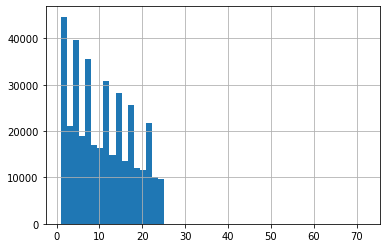

In [17]:
time_aggregations_df.rn.hist(bins=50)

In [18]:

cols = [
'name',
'rating',
'rates_num',
'reviews_num',
'reviews_responces_num',
'solved_problems_num',
]

top_10_client_banks ="""
Тинькофф 4.95 18443 39852 39644 696
Совкомбанк 4.93 10138 13351 13227 325
Газпромбанк 4.19 1009 2230 1924 360
ОТП-Банк 3.78 492 2644 1167 21
Открытие 3.02 772 1657 28 134
МТС-Банк 2.55 448 1861 1267 276
Почта-Банк 2.29 686 3080 774 44
Сбербанк 2.16 982 7998 3 66
Альфа-Банк 2.04 630 3877 851 287
ВТБ 1.61 842 5777 3312 144
"""

top_10_client_banks_df = pd.DataFrame(list(map(lambda x: x.split(' '), top_10_client_banks.strip().split('\n'))), columns=cols)
top_10_client_banks_df

name rating rates_num reviews_num reviews_responces_num  \
0     Тинькофф   4.95     18443       39852                 39644   
1   Совкомбанк   4.93     10138       13351                 13227   
2  Газпромбанк   4.19      1009        2230                  1924   
3     ОТП-Банк   3.78       492        2644                  1167   
4     Открытие   3.02       772        1657                    28   
5     МТС-Банк   2.55       448        1861                  1267   
6   Почта-Банк   2.29       686        3080                   774   
7     Сбербанк   2.16       982        7998                     3   
8   Альфа-Банк   2.04       630        3877                   851   
9          ВТБ   1.61       842        5777                  3312   

  solved_problems_num  
0                 696  
1                 325  
2                 360  
3                  21  
4                 134  
5                 276  
6                  44  
7                  66  
8                 287  
9                 144

In [19]:
import pickle


def load_df_from_pickle(file_name):
    with open(f'../data/{file_name}', 'rb') as f:
        pf = pickle.load(f)
    return pd.DataFrame(pf)

seo_competitors = load_df_from_pickle('competitors.pickle')
words_search =  load_df_from_pickle('words_search.pickle')

In [20]:
seo_competitors

ratio  volume  volume_total  volume_base   main_bank  \
0     0.723294  228400        335100       680779  tinkoff.ru   
1     0.710395  116840        120119       680779  tinkoff.ru   
2     0.701745  248212        367954       680779  tinkoff.ru   
3     0.678467  509013       1006755       680779  tinkoff.ru   
4     0.602938  226644        381868       680779  tinkoff.ru   
...        ...     ...           ...          ...         ...   
2195  0.000000       0             0        57211   akbars.ru   
2196  0.000000       0             0        57211   akbars.ru   
2197  0.000000       0             0        57211   akbars.ru   
2198  0.000000       0             0        57211   akbars.ru   
2199  0.000000       0             0        57211   akbars.ru   

              competitor  
0           alfastrah.ru  
1         payment.mts.ru  
2               ingos.ru  
3            yoomoney.ru  
4                reso.ru  
...                  ...  
2195      belarusbank.by  
2196       raiffeisen.ru  
2197         bankiros.ru  
2198       sochi.cian.ru  
2199  finance.rambler.ru  

[2200 rows x 6 columns]

#### To PG

In [127]:
import sys
PYTHON_PATH  = sys.executable
!$PYTHON_PATH -m pip install psycopg2 sqlalhemy

^C
Traceback (most recent call last):
  File "/Users/v.mamedov/.pyenv/versions/3.9.7/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/v.mamedov/.pyenv/versions/3.9.7/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/v.mamedov/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pip/__main__.py", line 31, in <module>
    sys.exit(_main())
  File "/Users/v.mamedov/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pip/_internal/cli/main.py", line 68, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/Users/v.mamedov/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pip/_internal/commands/__init__.py", line 109, in create_command
    module = importlib.import_module(module_path)
  File "/Users/v.mamedov/.pyenv/versions/3.9.7/lib/python3.9/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], packag

In [55]:
import sys
PYTHON_PATH  = sys.executable
!$PYTHON_PATH -m pip install psycopg2 sqlalhemy
from getpass import getpass
from sqlalchemy.engine import create_engine


connection_creds = dict(
    host=input('Host: '),
    database=input('DataBase name: '),
    user=input('Username: '),
    password=getpass('Password: '),
    port='5432'
)

In [110]:
# connection = pg.connect("host=localhost dbname=kinder user=your_username password=your_password")
db_url = "postgresql://%(user)s:%(password)s@%(host)s:%(port)s/%(database)s" % connection_creds
engine = create_engine(db_url, echo=False)
connection = engine.connect().execution_options(autocommit=True)
# frame.to_sql('SELECT * FROM product_product', connection)

def to_pg(frame, table):
    frame.to_sql(table, con=connection, if_exists='replace', index=False,chunksize=10_000)
    # ph.to_clickhouse(frame, table=table, chunksize=10_000, index=False, connection=connection)

In [131]:
to_pg(words_search, 'words_search')

In [128]:
to_pg(seo_competitors, 'seo_competitors')

In [122]:
to_pg(top_10_client_banks_df, 'top_10_client_banks')

In [111]:
to_pg(cliend_df, 'clients')
to_pg(card_df, 'cards')
to_pg(client_x_cards_df, 'client_x_cards')
to_pg(time_aggregations_df, 'client_aggregations')

## eda

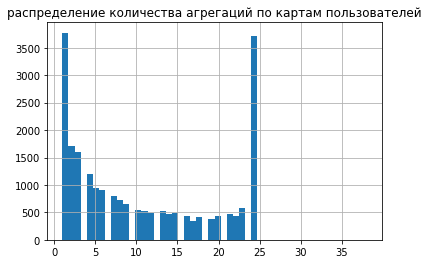

In [70]:
time_aggregations_df.groupby('card_id').purchase_count.count().hist(bins=50)
plt.title('распределение количества агрегаций по картам пользователей')
plt.show()

#### Почему много 1 и 25?

In [90]:
# берем id карт для анализа
time_aggregations_vc = time_aggregations_df.card_id.value_counts()
# time_aggregations_vc.value_counts()

##### 1

In [74]:
card_df[card_df['card_id'] == '907855ad724e7e3f6e4842c7489e374e']

card_id  \
1430  907855ad724e7e3f6e4842c7489e374e   

                            product_category_name card_type_name card_type  \
1430  Договор на текущий счет для дебетовой карты        МИР СКБ        dc   

      start_date  fact_close_date  
1430      2018.0           2021.0

In [75]:
time_aggregations_df[time_aggregations_df['card_id'] == '907855ad724e7e3f6e4842c7489e374e']

card_id  purchase_count  purchase_sum  \
134380  907855ad724e7e3f6e4842c7489e374e               0           0.0   

        current_balance_avg_sum  current_balance_sum  current_debit_turn_sum  \
134380                      0.0                  0.0                     0.0   

        current_credit_turn_sum  
134380                      0.0

Видим, что 1 появляются из-за неактивности пользователей

##### 25

In [76]:
card_df[card_df['card_id'] == 'b6cc584685bec2464b085d5a49a1d562']

card_id  \
7961  b6cc584685bec2464b085d5a49a1d562   

                            product_category_name            card_type_name  \
7961  Договор на текущий счет для дебетовой карты  Eurocard/MasterCard Mass   

     card_type  start_date  fact_close_date  
7961        dc      2022.0              NaN

In [77]:
time_aggregations_df[time_aggregations_df['card_id'] == 'b6cc584685bec2464b085d5a49a1d562']

card_id  purchase_count  purchase_sum  \
170009  b6cc584685bec2464b085d5a49a1d562               0           0.0   
170010  b6cc584685bec2464b085d5a49a1d562               0           0.0   
170011  b6cc584685bec2464b085d5a49a1d562               0           0.0   
170012  b6cc584685bec2464b085d5a49a1d562               0           0.0   
170013  b6cc584685bec2464b085d5a49a1d562               0           0.0   
170014  b6cc584685bec2464b085d5a49a1d562               0           0.0   
170015  b6cc584685bec2464b085d5a49a1d562               0           0.0   
170016  b6cc584685bec2464b085d5a49a1d562               0           0.0   
170017  b6cc584685bec2464b085d5a49a1d562               0           0.0   
170018  b6cc584685bec2464b085d5a49a1d562               2        1300.0   
170019  b6cc584685bec2464b085d5a49a1d562               9        2600.0   
170020  b6cc584685bec2464b085d5a49a1d562               9        8500.0   
170021  b6cc584685bec2464b085d5a49a1d562              14        7200.0   
170022  b6cc584685bec2464b085d5a49a1d562              17        7700.0   
170023  b6cc584685bec2464b085d5a49a1d562              18        7800.0   
170024  b6cc584685bec2464b085d5a49a1d562              23       14600.0   
170025  b6cc584685bec2464b085d5a49a1d562              23        9100.0   
170026  b6cc584685bec2464b085d5a49a1d562              27        9400.0   
170027  b6cc584685bec2464b085d5a49a1d562              27       13800.0   
170028  b6cc584685bec2464b085d5a49a1d562              31       12700.0   
170029  b6cc584685bec2464b085d5a49a1d562              35       13000.0   
170030  b6cc584685bec2464b085d5a49a1d562              36       12000.0   
170031  b6cc584685bec2464b085d5a49a1d562              38       13700.0   
170032  b6cc584685bec2464b085d5a49a1d562              38       20500.0   

        current_balance_avg_sum  current_balance_sum  current_debit_turn_sum  \
170009                  15100.0              23900.0                 29000.0   
170010                  56200.0              59100.0                 29000.0   
170011                  51400.0              47100.0                 24000.0   
170012                  62000.0              85800.0                     0.0   
170013                  40900.0              21200.0                101000.0   
170014                  30800.0              60400.0                 37500.0   
170015                  58800.0              48700.0                 29000.0   
170016                  55200.0              64400.0                 22000.0   
170017                  32700.0              52500.0                 52000.0   
170018                  63500.0              61300.0                 36300.0   
170019                   1900.0              13300.0                  2700.0   
170020                   3700.0                900.0                  8600.0   
170021                   9700.0              13500.0                 37300.0   
170022                  15900.0               9400.0                 55800.0   
170023                   6500.0              17100.0                 33800.0   
170024                  10900.0               1700.0                 31600.0   
170025                  12200.0              17800.0                 36200.0   
170026                  15000.0              10000.0                 41000.0   
170027                  14900.0              14300.0                 40900.0   
170028                  11000.0              14500.0                 36800.0   
170029                  16500.0              37200.0                 33400.0   
170030                  10100.0              16500.0                 30100.0   
170031                  14900.0              13300.0                 72700.0   
170032                  41400.0              20900.0                 85500.0   

        current_credit_turn_sum  
170009                  36400.0  
170010                  64200.0  
170011                  12100.0  
170012                  38700.0  
170013     

Если у нас много записей с purchase_sum = 0 на карте, это значит, что пользователь переводит деньги между счетами/credit card

In [82]:
# карты по которым 24 агрегаци
card_ids_24 = time_aggregations_vc[time_aggregations_vc == 24].index.unique()
time_aggregations_df_24 = time_aggregations_df[time_aggregations_df['card_id'].isin(card_ids_24)]
card_df_24 = card_df[card_df['card_id'].isin(card_ids_24)]

<AxesSubplot:>

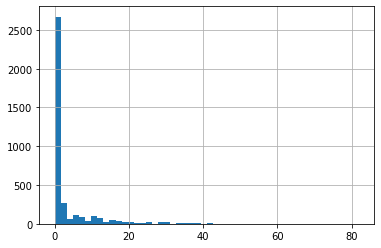

In [84]:
time_aggregations_df_24.groupby('card_id').purchase_count.min().hist(bins=50)

<AxesSubplot:>

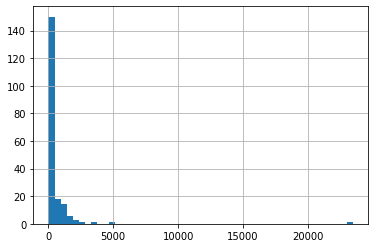

In [89]:
time_aggregations_df_24.groupby('purchase_count').card_id.count().hist(bins=50)

Если у нас много записей с purchase_sum = 0 на карте, это значит, что пользователь переводит деньги между счетами/credit card

#### Количество карт

<AxesSubplot:>

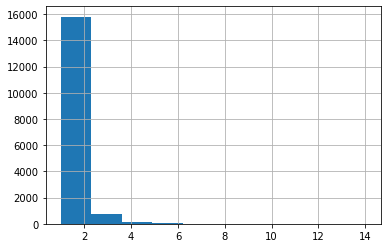

In [92]:
client_x_cards_df.groupby('client_id').card_id.count().hist()

#### Активность клиентов

 ##### По покупкам

In [113]:
print('Медиана по карте:', time_aggregations_df.groupby('card_id').purchase_sum.median().median())
print('Среднее по карте:', time_aggregations_df.groupby('card_id').purchase_sum.median().mean())
print('STD по карте:', time_aggregations_df.groupby('card_id').purchase_sum.median().std())

Медиана по карте: 100.0
Среднее по карте: 5787.968826108135
STD по карте: 19180.12489412679


<AxesSubplot:>

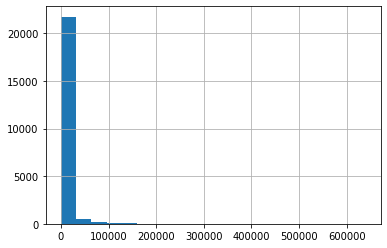

In [95]:
time_aggregations_df.groupby('card_id').purchase_sum.median().hist(bins=20)

<AxesSubplot:>

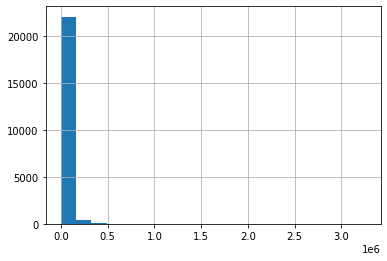

In [97]:
time_aggregations_df.groupby('card_id').purchase_sum.max().hist(bins=20)

Мало клиентов, которые покупают по картам банка

Ориентируемся на клиентские банки

##### По оборотам дебета (переводы, зп)

In [115]:
print('Медиана по карте:', time_aggregations_df.groupby('card_id').current_debit_turn_sum.median().median())
print('Среднее по карте:', time_aggregations_df.groupby('card_id').current_debit_turn_sum.median().mean())
print('STD по карте:', time_aggregations_df.groupby('card_id').current_debit_turn_sum.median().std())

Медиана по карте: 7850.0
Среднее по карте: 25928.831421866005
STD по карте: 91502.58799542296


<AxesSubplot:>

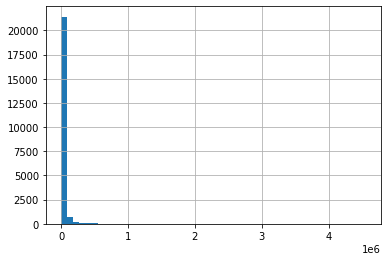

In [104]:
time_aggregations_df.groupby('card_id').current_debit_turn_sum.median().hist(bins=50)

##### По оборотам кредита

In [114]:
print('Медиана по карте:', time_aggregations_df.groupby('card_id').current_credit_turn_sum.median().median())
print('Среднее по карте:', time_aggregations_df.groupby('card_id').current_credit_turn_sum.median().mean())
print('STD по карте:', time_aggregations_df.groupby('card_id').current_credit_turn_sum.median().std())

Медиана покупок по карте: 7900.0
Среднее покупок по карте: 26760.268786255147
STD покупок по карте: 94422.91459903048


<AxesSubplot:>

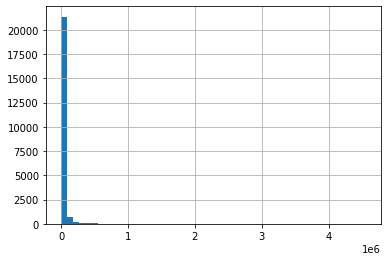

In [117]:
time_aggregations_df.groupby('card_id').current_credit_turn_sum.median().hist(bins=50)

#### Смотрим на города

In [119]:
cliend_df['city'].value_counts()

Уфа                 2337
Москва              1491
Краснодар            914
Санкт-Петербург      659
Стерлитамак          478
                    ... 
Курганинск             9
Языково                8
Исянгулово             7
Березники              6
Николо-Березовка       5
Name: city, Length: 150, dtype: int64